In [1]:
import os
import sys

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# set the directories
if sys.platform.startswith('win32'):
    data_dir = 'C:\\Users\\FMM\\Documents\\DIFA\\gymnoTOA\\cluster-split-align-sequences-loop'
elif sys.platform.startswith('linux'):
    data_dir = '/home/fmm/Documents/Trabajo/cluster-split-align-sequences-loop'


In [3]:
# set the values identifying the experiment
s = '4.0'
c = '0.8'
msi = '0.850'


In [4]:
# set the file name
csv_file = f'Acrogymnospermae-protein-sequences-S{s}-C{c}-MSI{msi}-mafft-identity-percentage.csv'


In [5]:
# set the path of the CSV file
csv_path = f'{data_dir}{os.sep}{csv_file}'


In [6]:
# read the CSV data
data_df=pd.read_csv(csv_path, sep=';', header=None, names=['cluster', 'identify_percentage', 'sequence_number'])
data_df


,cluster,identify_percentage,sequence_number
0,cluster000001-mafft.fasta,100.000000,1
1,cluster000002-mafft.fasta,100.000000,1
2,cluster000003-mafft.fasta,100.000000,1
3,cluster000004-mafft.fasta,100.000000,1
4,cluster000005-mafft.fasta,100.000000,4
...,...,...,...
207984,cluster207985-mafft.fasta,100.000000,1
207985,cluster207986-mafft.fasta,100.000000,2
207986,cluster207987-mafft.fasta,100.000000,1
207987,cluster207988-mafft.fasta,100.000000,1


In [7]:
# remove the row corresponding to the global identity pecentage
data_df = data_df[data_df['cluster'] != 'global identity percentage']
data_df


,cluster,identify_percentage,sequence_number
0,cluster000001-mafft.fasta,100.0,1
1,cluster000002-mafft.fasta,100.0,1
2,cluster000003-mafft.fasta,100.0,1
3,cluster000004-mafft.fasta,100.0,1
4,cluster000005-mafft.fasta,100.0,4
...,...,...,...
207983,cluster207984-mafft.fasta,100.0,1
207984,cluster207985-mafft.fasta,100.0,1
207985,cluster207986-mafft.fasta,100.0,2
207986,cluster207987-mafft.fasta,100.0,1


In [8]:
# calculate the occurences of the distinct values of the column "sequence number"
occurences_ser = data_df['sequence_number'].value_counts()
occurences_ser


sequence_number
1      161850
2       28770
3        4607
4        2695
5        1554
        ...  
181         1
511         1
190         1
236         1
291         1
Name: count, Length: 276, dtype: int64

In [9]:
# build a dataframe of occurences
occurences_df = occurences_ser.to_frame()
occurences_df

,count
sequence_number,
1,161850
2,28770
3,4607
4,2695
5,1554
...,...
181,1
511,1
190,1


In [10]:
# reindex the occurrences dataframe keeping the old index in a new column
occurences_df.reset_index(drop=False, inplace=True)
occurences_df

,sequence_number,count
0,1,161850
1,2,28770
2,3,4607
3,4,2695
4,5,1554
...,...,...
271,181,1
272,511,1
273,190,1
274,236,1


In [11]:
# sort data by the sequence number value in ascending order
occurences_df = occurences_df.sort_values(by='sequence_number', ascending=True, inplace=False)
occurences_df


,sequence_number,count
0,1,161850
1,2,28770
2,3,4607
3,4,2695
4,5,1554
...,...,...
170,775,1
251,844,1
259,848,1
263,864,1


In [12]:
# reindex the dataframe without keeping the old index values
occurences_df.reset_index(drop=True, inplace=True)
occurences_df


,sequence_number,count
0,1,161850
1,2,28770
2,3,4607
3,4,2695
4,5,1554
...,...,...
271,775,1
272,844,1
273,848,1
274,864,1


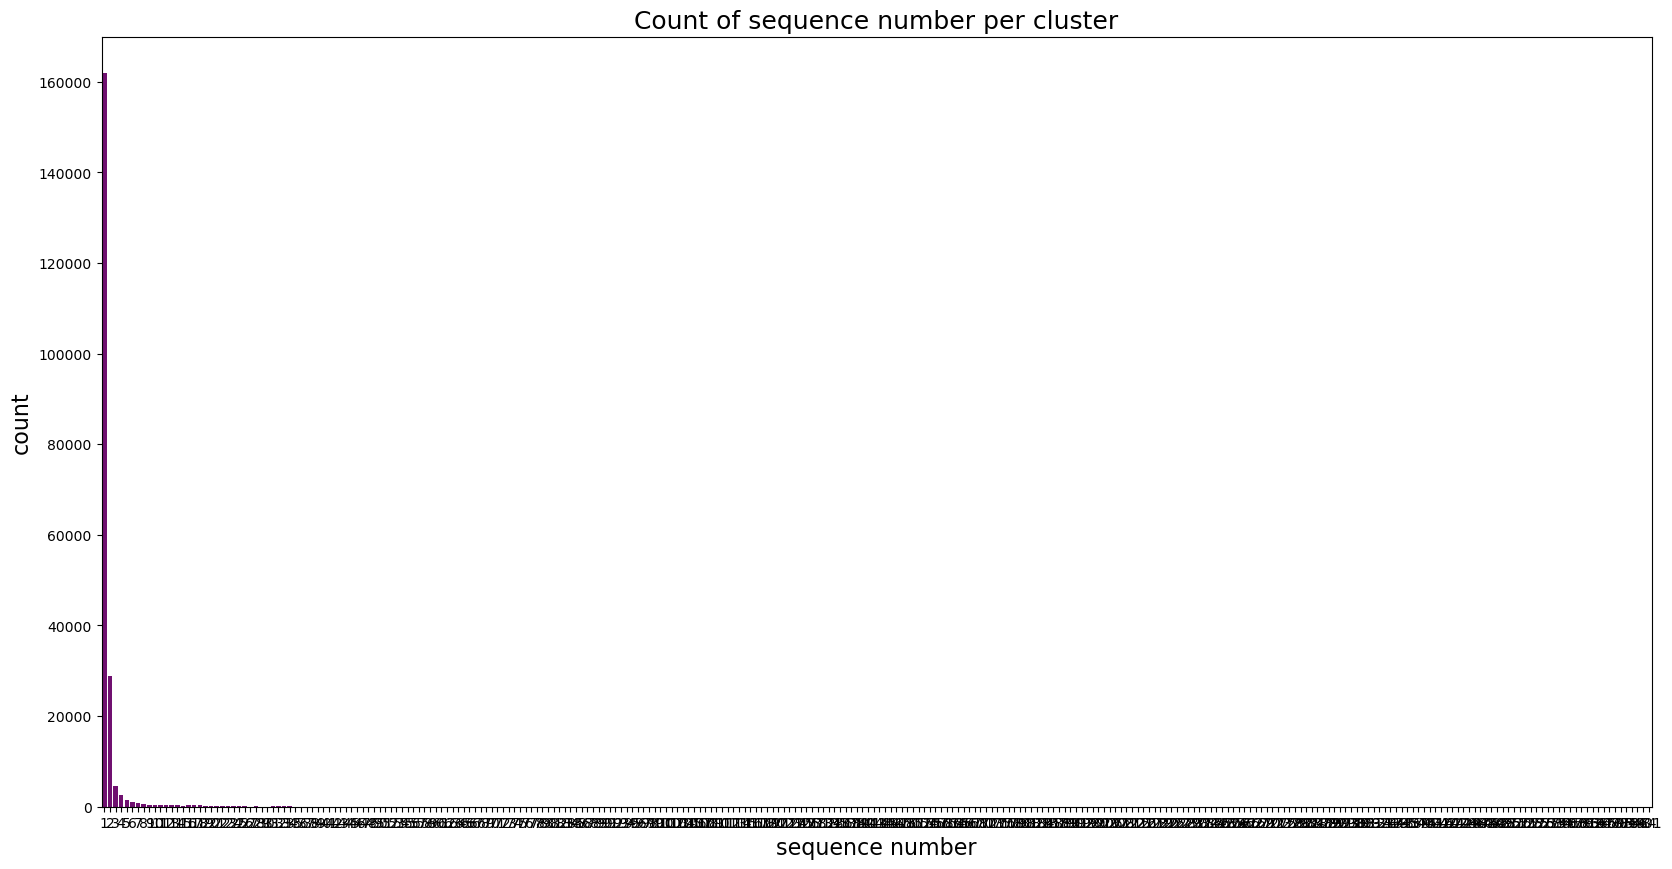

In [13]:
# display the bar plot of the count of sequence number per cluster
plt.figure(figsize=(20, 10))
sns.barplot(data=data_df, x=occurences_df['sequence_number'], y=occurences_df['count'], color='purple')
plt.title('Count of sequence number per cluster', fontsize=18)
plt.xlabel('sequence number', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()


In [14]:
# remove occurences with count less than 50
filtered_occurences_df = occurences_df[occurences_df['count'] >= 50]
filtered_occurences_df


,sequence_number,count
0,1,161850
1,2,28770
2,3,4607
3,4,2695
4,5,1554
5,6,1036
6,7,777
7,8,563
8,9,456
9,10,408


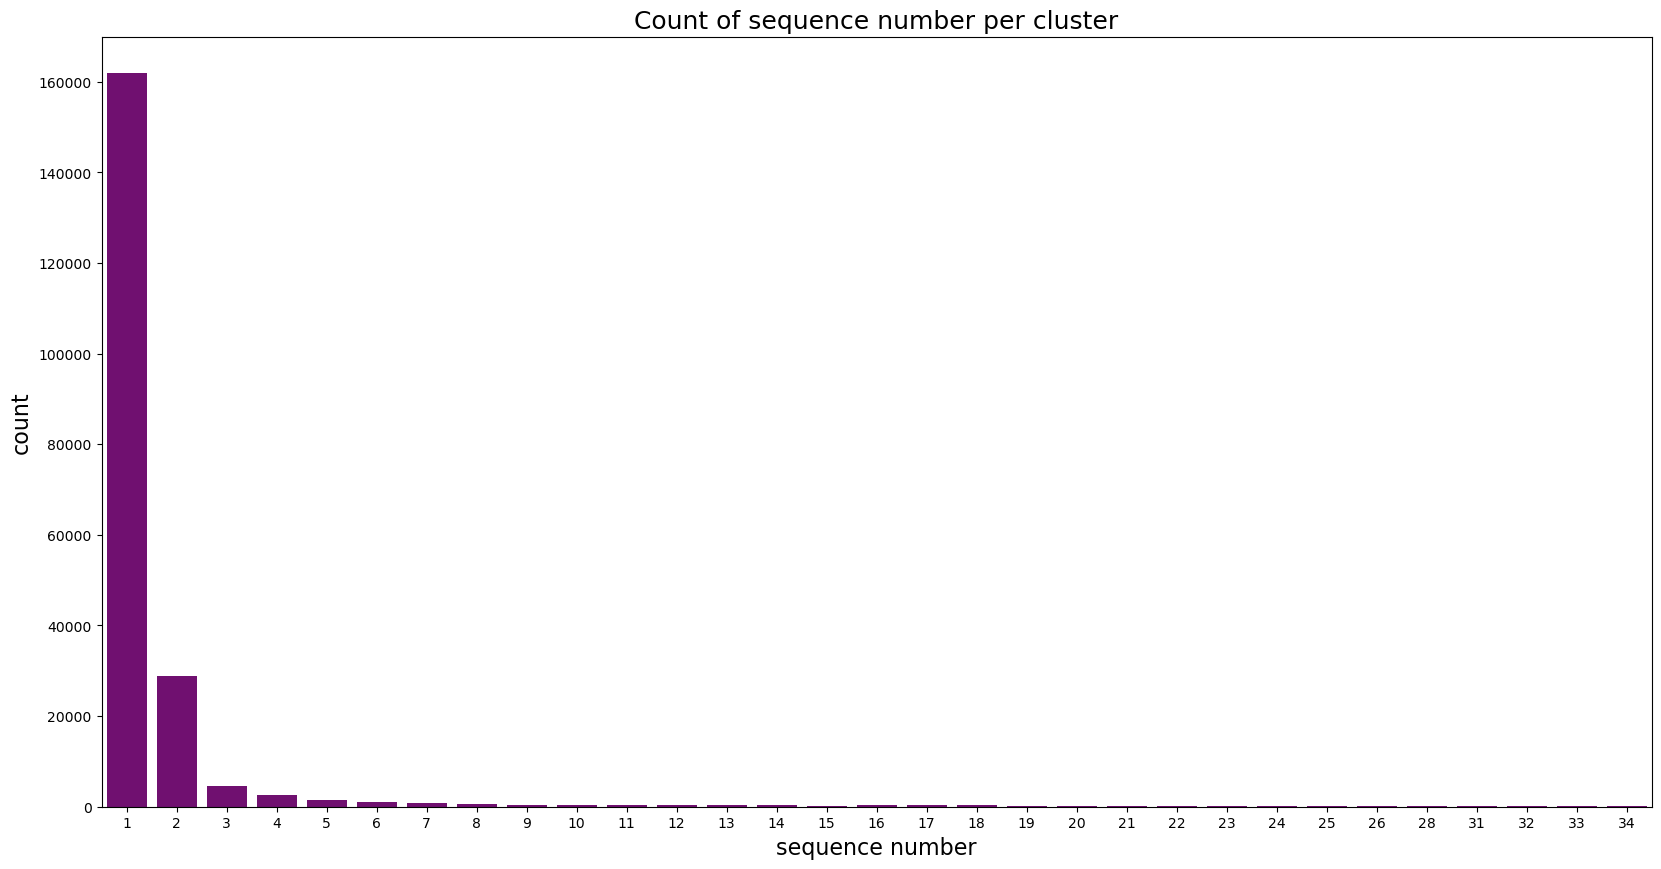

In [15]:
# display the bar plot of the occurences with count greater than or equal to 50
plt.figure(figsize=(20, 10))
sns.barplot(x=filtered_occurences_df['sequence_number'], y=filtered_occurences_df['count'], color='purple')
plt.title('Count of sequence number per cluster', fontsize=18)
plt.xlabel('sequence number', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.show()


In [16]:
# show the count of the 15th sequence numbers
for i in range(15):
    print(f'{occurences_df["sequence_number"][i]}: {occurences_df["count"][i]}')
print(f'Total 1-15: {sum(occurences_df["count"][0:15])}')

1: 161850
2: 28770
3: 4607
4: 2695
5: 1554
6: 1036
7: 777
8: 563
9: 456
10: 408
11: 374
12: 365
13: 311
14: 282
15: 268
Total 1-15: 204316
